In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation

from keras.preprocessing.image import ImageDataGenerator, load_img

In [5]:
input_shape=(150,150,3)
img_width, img_height = 150, 150


In [6]:
train_data = '/content/drive/My Drive/augmented_image'
validation_data ='/content/drive/My Drive/Amazon_webscraping/Test'

In [7]:
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data,
         target_size=(img_width,img_height),
         batch_size=32,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data,
         target_size=(img_width,img_height),
         batch_size=32,
         class_mode='categorical')

Found 1568 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
nb_train_samples=1568
nb_validation_samples=60
batch_size= 32
epochs=20

In [9]:

#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) 
# Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))

In [10]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)       

Using ADAM optimizer


In [33]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Model.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience =3, verbose = 1, min_delta = 0.001)

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early, reduce_lr])

Epoch 1/20
49/49 [==============================] - 46s 940ms/step - loss: 1.0797 - accuracy: 0.4062 - val_loss: 1.1255 - val_accuracy: 0.3125

Epoch 00001: val_loss improved from inf to 1.12548, saving model to Model.h5
Epoch 2/20
49/49 [==============================] - 46s 929ms/step - loss: 1.0795 - accuracy: 0.4062 - val_loss: 1.1109 - val_accuracy: 0.3571

Epoch 00002: val_loss improved from 1.12548 to 1.11094, saving model to Model.h5
Epoch 3/20
49/49 [==============================] - 45s 917ms/step - loss: 1.0795 - accuracy: 0.4062 - val_loss: 1.1037 - val_accuracy: 0.4375

Epoch 00003: val_loss improved from 1.11094 to 1.10369, saving model to Model.h5
Epoch 4/20
49/49 [==============================] - 45s 920ms/step - loss: 1.0795 - accuracy: 0.4062 - val_loss: 1.1350 - val_accuracy: 0.2143

Epoch 00004: val_loss did not improve from 1.10369
Epoch 5/20
49/49 [==============================] - 45s 919ms/step - loss: 1.0795 - accuracy: 0.4062 - val_loss: 1.0949 - val_accuracy

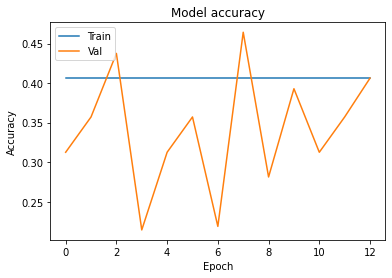

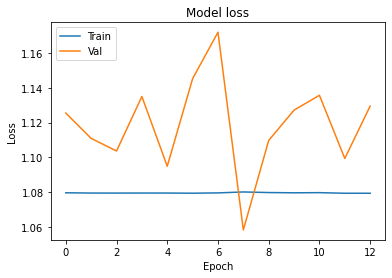

In [35]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Using RMS PROP Optimiizer

In [36]:
from keras.optimizers import RMSprop
opt = RMSprop(lr=0.001, decay = 1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Model.h6", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience =3, verbose = 1, min_delta = 0.001)

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early, reduce_lr])



Epoch 1/20
49/49 [==============================] - 46s 942ms/step - loss: 1.0794 - accuracy: 0.4062 - val_loss: 1.1283 - val_accuracy: 0.4062

Epoch 00001: val_loss improved from inf to 1.12831, saving model to Model.h5
Epoch 2/20
49/49 [==============================] - 45s 921ms/step - loss: 1.0794 - accuracy: 0.4062 - val_loss: 1.1068 - val_accuracy: 0.2500

Epoch 00002: val_loss improved from 1.12831 to 1.10679, saving model to Model.h5
Epoch 3/20
49/49 [==============================] - 46s 938ms/step - loss: 1.0794 - accuracy: 0.4062 - val_loss: 1.0958 - val_accuracy: 0.3125

Epoch 00003: val_loss improved from 1.10679 to 1.09581, saving model to Model.h5
Epoch 4/20
49/49 [==============================] - 45s 917ms/step - loss: 1.0794 - accuracy: 0.4062 - val_loss: 1.1440 - val_accuracy: 0.3571

Epoch 00004: val_loss did not improve from 1.09581
Epoch 5/20
49/49 [==============================] - 45s 918ms/step - loss: 1.0794 - accuracy: 0.4062 - val_loss: 1.0850 - val_accuracy

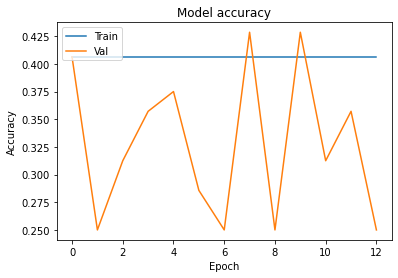

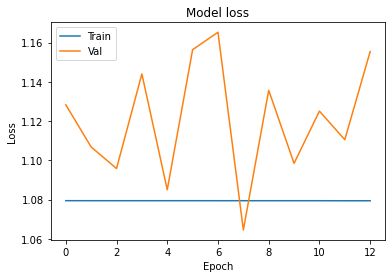

In [38]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Using SGD + Momentum Optimizer


In [39]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum = True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Model.h7", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience =3, verbose = 1, min_delta = 0.001)

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early, reduce_lr])



Epoch 1/20
49/49 [==============================] - 45s 926ms/step - loss: 1.0864 - accuracy: 0.3916 - val_loss: 1.1566 - val_accuracy: 0.3438

Epoch 00001: val_loss improved from inf to 1.15658, saving model to Model.h5
Epoch 2/20
49/49 [==============================] - 45s 917ms/step - loss: 1.0990 - accuracy: 0.3712 - val_loss: 1.1136 - val_accuracy: 0.4286

Epoch 00002: val_loss improved from 1.15658 to 1.11356, saving model to Model.h5
Epoch 3/20
49/49 [==============================] - 45s 917ms/step - loss: 1.1000 - accuracy: 0.3731 - val_loss: 1.1173 - val_accuracy: 0.3438

Epoch 00003: val_loss did not improve from 1.11356
Epoch 4/20
49/49 [==============================] - 45s 922ms/step - loss: 1.0932 - accuracy: 0.3858 - val_loss: 1.1408 - val_accuracy: 0.3214

Epoch 00004: val_loss did not improve from 1.11356
Epoch 5/20
49/49 [==============================] - 45s 914ms/step - loss: 1.0932 - accuracy: 0.3820 - val_loss: 1.1055 - val_accuracy: 0.3438

Epoch 00005: val_los

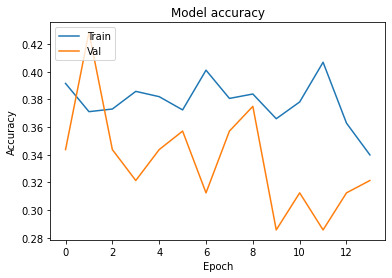

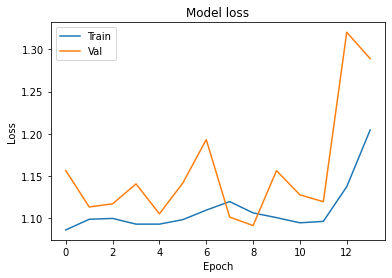

In [41]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Using NADAM Optimizer

In [42]:
from keras.optimizers import Nadam
opt = Nadam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Model.h8", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience =3, verbose = 1, min_delta = 0.001)

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early, reduce_lr])



Epoch 1/20
49/49 [==============================] - 48s 976ms/step - loss: 1.0827 - accuracy: 0.4062 - val_loss: 1.1717 - val_accuracy: 0.2500

Epoch 00001: val_loss improved from inf to 1.17175, saving model to Model.h5
Epoch 2/20
49/49 [==============================] - 46s 938ms/step - loss: 1.0813 - accuracy: 0.4062 - val_loss: 1.0909 - val_accuracy: 0.4286

Epoch 00002: val_loss improved from 1.17175 to 1.09089, saving model to Model.h5
Epoch 3/20
49/49 [==============================] - 45s 922ms/step - loss: 1.0806 - accuracy: 0.4062 - val_loss: 1.1536 - val_accuracy: 0.3438

Epoch 00003: val_loss did not improve from 1.09089
Epoch 4/20
49/49 [==============================] - 47s 952ms/step - loss: 1.0801 - accuracy: 0.4062 - val_loss: 1.0954 - val_accuracy: 0.3214

Epoch 00004: val_loss did not improve from 1.09089
Epoch 5/20
49/49 [==============================] - 45s 924ms/step - loss: 1.0799 - accuracy: 0.4062 - val_loss: 1.1250 - val_accuracy: 0.3438

Epoch 00005: val_los

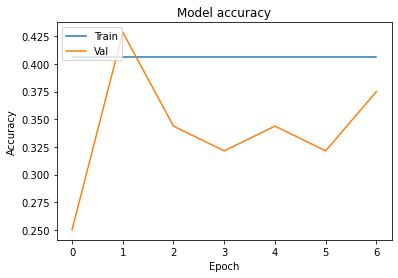

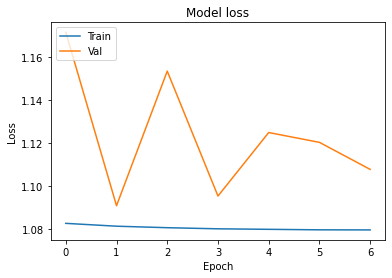

In [44]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Using Nesterov Accelerated Gradient descent

In [11]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, nesterov = True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Model.h8", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience =3, verbose = 1, min_delta = 0.001)

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early, reduce_lr])



Epoch 1/20
49/49 [==============================] - 568s 12s/step - loss: 1.0760 - accuracy: 0.4477 - val_loss: 1.1296 - val_accuracy: 0.2812

Epoch 00001: val_loss improved from inf to 1.12960, saving model to Model.h8
Epoch 2/20
49/49 [==============================] - 45s 923ms/step - loss: 0.9942 - accuracy: 0.5517 - val_loss: 1.2324 - val_accuracy: 0.3929

Epoch 00002: val_loss did not improve from 1.12960
Epoch 3/20
49/49 [==============================] - 45s 912ms/step - loss: 0.9027 - accuracy: 0.5861 - val_loss: 1.3703 - val_accuracy: 0.3438

Epoch 00003: val_loss did not improve from 1.12960
Epoch 4/20
49/49 [==============================] - 45s 921ms/step - loss: 0.8300 - accuracy: 0.6256 - val_loss: 1.6043 - val_accuracy: 0.3214

Epoch 00004: val_loss did not improve from 1.12960

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 5/20
49/49 [==============================] - 45s 911ms/step - loss: 0.7622 - accuracy: 0.6614 - val_loss: 1

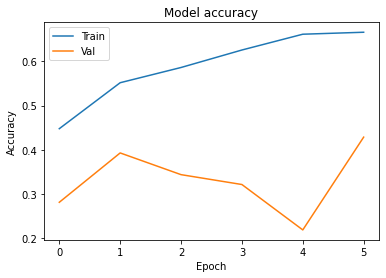

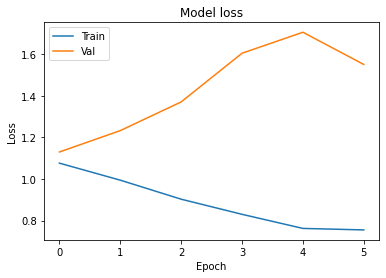

In [13]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()